In [85]:
import pandas
df = pandas.read_csv("C:/Users/BRUNO/Documents/KCL/Year 4/ML/Machine-Learning-Projects/Titanic/titantic_ds_train.csv")
X = df[['Pclass','Sex','SibSp','Parch']]
X = X.replace({'male':0,'female':1})
y = df.loc[:,'Survived']

ds = X.copy()
ds['Survived'] = y

C:\Users\BRUNO\AppData\Local\Temp\ipykernel_15784\2810042527.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({'male':0,'female':1})


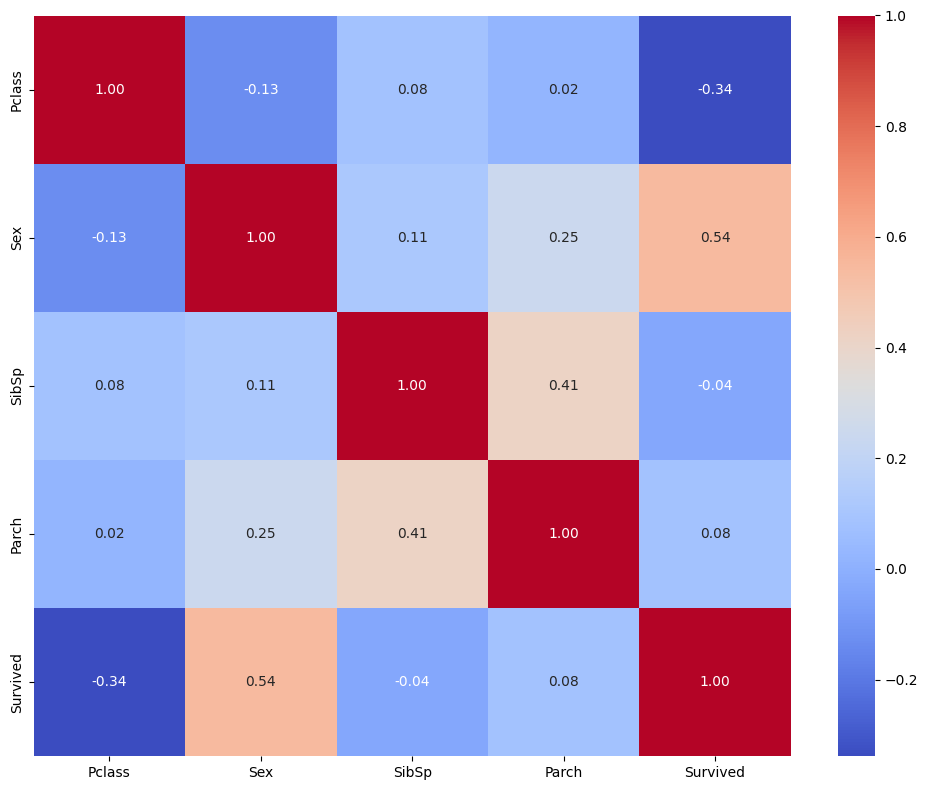

In [86]:
import seaborn
import matplotlib.pyplot as plt

corr_matrix = ds.corr()

plt.figure(figsize=(10,8))
seaborn.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.tight_layout()
plt.show()

In [87]:
# 3 clear standout factors, Pclass, Sex and SibSp
# Using a logistic regression
import collections
from sklearn import linear_model
import numpy

logr = linear_model.LogisticRegression()
logr.fit(X,y)

test_ds = pandas.read_csv("C:/Users/BRUNO/Documents/KCL/Year 4/ML/Machine-Learning-Projects/Titanic/titantic_ds_test.csv")
X_test = test_ds[['Pclass','Sex','SibSp','Parch']]
X_test = X_test.replace({'male':0,'female':1})
prediction = logr.predict(X_test)


def count(arr):
    num_died = 0
    num_saved = 0
    for val in arr:
        if val == 0:
            num_died += 1
        else:
            num_saved += 1
    return num_died,num_saved


died, saved = count(prediction)

print(f"Rate of non-survival: {died / (died + saved)}")
print(f"Rate of survival: {saved / (died + saved)}")

Rate of non-survival: 0.6435406698564593
Rate of survival: 0.35645933014354064


C:\Users\BRUNO\AppData\Local\Temp\ipykernel_15784\3640341698.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace({'male':0,'female':1})


In [88]:
# Attempting with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
rf.fit(X, y)


test_ds = pandas.read_csv("C:/Users/BRUNO/Documents/KCL/Year 4/ML/Machine-Learning-Projects/Titanic/titantic_ds_test.csv")
X_test = test_ds[['Pclass','Sex','SibSp','Parch']]
X_test = X_test.replace({'male':0,'female':1})
prediction = rf.predict(X_test)


died, saved = count(prediction)

print(f"Rate of non-survival: {died / (died + saved)}")
print(f"Rate of survival: {saved / (died + saved)}")


Rate of non-survival: 0.6578947368421053
Rate of survival: 0.34210526315789475


C:\Users\BRUNO\AppData\Local\Temp\ipykernel_15784\486678075.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace({'male':0,'female':1})


In [ ]:
# At this point we observe very similar values, tuning hyperparameters may make a difference
 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

rf = RandomForestClassifier(**grid_search.best_params_)
rf.fit(X, y)


prediction = rf.predict(X_test)

died, saved = count(prediction)

print(f"Rate of non-survival: {died / (died + saved)}")
print(f"Rate of survival: {saved / (died + saved)}")


output = pandas.DataFrame({'PassengerId':test_ds.PassengerId,'Survived':prediction})
output.to_csv('survival_rates.csv',index=False)


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)
Rate of non-survival: 0.6698564593301436
Rate of survival: 0.33014354066985646
